In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import os
#import nxviz
#from nxviz.plots import CircosPlot

In [2]:
df = pd.read_csv("SCSENodes.csv")
df = df.drop([df.columns[0]], axis = 1)

In [3]:
for year in range(2000,2022):
    df[str(year)] = df[str(year)].apply(lambda x : x.strip('][').split(','))

In [4]:
def  init():
    try:
        os.mkdir("Graph")
    except Exception as e:
        pass

def draw_graph_year(year):
    init()
    G = nx.Graph()
    for i in faculty:
        if i != '':
            G.add_node(i)
    collabs = df[year].to_list()
    for i in range(len(collabs)):
        for j in collabs[i]:
            if j != '':
                G.add_edge(faculty[i],j)  
    plt.figure(figsize = (24,12))
    nx.draw_random(G, with_labels=True, font_weight='bold')
    plt.show()
    g = Network(height = 1024, width = 1024, notebook = True)
    #g.show_buttons()
    g.toggle_hide_edges_on_drag(True)
    c = CircosPlot(G, node_labels=True)
    g.barnes_hut()
    g.from_nx(G)
    c.draw()
    plt.show()  # only needed in scripts
    g.show(f"Graph/{year}.html")    

In [5]:
faculty = df.Faculty.to_list()

for i in (range(2020,2021)):
    draw_graph_year(str(i))

draw_graph_year('2021')

In [6]:
df

Faculty             Position Gender Management  \
0         A S Madhukumar  Associate Professor      M          N   
1          Alexei Sourin  Associate Professor      M          N   
2   Anupam Chattopadhyay  Associate Professor      M          N   
3        Anwitaman Datta  Associate Professor      M          N   
4            Arijit Khan  Assistant Professor      M          N   
..                   ...                  ...    ...        ...   
80          Wen Yonggang            Professor      M          N   
81         Zhang Tianwei  Assistant Professor      M          N   
82             Boyang Li  Associate Professor      M          N   
83            Liu Zhiwei  Assistant Professor      M          N   
84          Luu Anh Tuan  Assistant Professor      M          N   

                     Area 2000 2001                2002                2003  \
0       Computer Networks   []   []  ['Lau Chiew Tong']  ['Lau Chiew Tong']   
1       Computer Graphics   []   []                  []                  []   
2   Computer Architecture   []   []                  []                  []   
3     Distributed Systems   []   []                  []                  []   
4         Data Management   []   []                  []                  []   
..                    ...  ...  ...                 ...                 ...   
80             Multimedia   []   []                  []                  []   
81         Cyber Security   []   []                  []                  []   
82                  AI/ML   []   []                  []                  []   
83        Computer Vision   []   []                  []                  []   
84                  AI/ML   []   []                  []                  []   

                  2004  ...  \
0   ['Lau Chiew Tong']  ...   
1   ['Seah Hock Soon']  ...   
2                   []  ...   
3                   []  ...   
4                   []  ...   
..                 ...  ...   
80                  []  ...   
81                  []  ...   
82                  []  ...   
83                  []  ...   
84                  []  ...   

                                                 2012  \
0                                  ['Lau Chiew Tong']   
1                                  ['Seah Hock Soon']   
2                                ['Sourav Sen Gupta']   
3   ['Sun Aixin',  'Lee Bu Sung Francis',  'Zhang ...   
4                                                  []   
..                                                ...   
80                   ['Cai Jianfei',  'Ng Wee Keong']   
81                                                 []   
82  ['Ong Yew Soon',  'Yu Han',  'Shen Zhiqi',  'M...   
83                                                 []   
84                                       ['Liu Yang']   

                                                 2013  \
0                                  ['Lau Chiew Tong']   
1                                  ['Seah Hock Soon']   
2                                ['Sourav Sen Gupta']   
3   ['Sun Aixin',  'Ng Wee Keong',  'Lee Bu Sung F...   
4                                                  []   
..                                                ...   
80  ['Ong Yew Soon',  'Cai Jianfei',  'Ng Wee Keong']   
81                                                 []   
82  ['Ong Yew Soon',  'Yu Han',  'Shen Zhiqi',  'M...   
83                                                 []   
84                                       ['Liu Yang']   

                                                 2014  \
0                 ['Dusit Niyato',  'Lau Chiew Tong']   
1                                  ['Seah Hock Soon']   
2                                ['Sourav Sen Gupta']   
3   ['Ng Wee Keong',  'Sun Aixin',  'Lee Bu Sung F...   
4                                                  []   
..                                                ...   
80  ['Cai Jianfei',  'Dusit Niyato',  'Ng Wee Keon...   
81                                                 []   
82  ['O

In [7]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [8]:
#from bokeh.resources import INLINE
#import bokeh.io
#bokeh.io.output_notebook(INLINE)

In [9]:
def draw_graph_year(year):
    init()
    title = 'Network'
    HOVER_TOOLTIPS = [("Faculty", "@index")]
    plot = figure(tooltips = HOVER_TOOLTIPS,
                  tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
                x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)
    
    G = nx.Graph()
    for i in faculty:
        if i != '':
            G.add_node(i)
    collabs = df[year].to_list()
    for i in range(len(collabs)):
        for j in collabs[i]:
            if j != '':
                G.add_edge(faculty[i],j)  
    plt.figure(figsize = (24,12))
    nx.draw_random(G, with_labels=True, font_weight='bold')
    plt.show()
    g = Network(height = 1024, width = 1024, notebook = True)
    #g.show_buttons()
    g.toggle_hide_edges_on_drag(True)
    #c = CircosPlot(G, node_labels=True)
    g.barnes_hut()
    g.from_nx(G)
    #c.draw()
    plt.show()  # only needed in scripts
    g.show(f"Graph/{year}.html")  
    
    #BOKEH:
    network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))
    network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')
    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)
    plot.renderers.append(network_graph)
    show(plot)
    
    # plot with different sized node degrees + labels
    degrees = dict(nx.degree(G))
    betweenness_centrality = nx.betweenness_centrality(G)
    
    nx.set_node_attributes(G, name='degree', values=degrees)
    nx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
    
    number_to_adjust_by = 5
    adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(G)])
    nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)
    size_by_this_attribute = 'adjusted_node_size'
    color_by_this_attribute = 'adjusted_node_size'

    color_palette = Viridis8
    title = 'Network with node sizes according to degree'
    HOVER_TOOLTIPS = [
        ("Faculty", "@index"),
        ("Degree", "@degree"),
        ("Betweenness Centrality", "@betweenness")
    ]

    plot = figure(tooltips = HOVER_TOOLTIPS,
                  tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
                x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

    network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

    minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
    maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
    network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

    plot.renderers.append(network_graph)
    
    #Add Labels
    x, y = zip(*network_graph.layout_provider.graph_layout.values())
    node_labels = list(G.nodes())
    source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
    labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
    plot.renderers.append(labels)

    show(plot)
            

In [10]:
from bokeh.models.widgets import Slider
from bokeh.models.widgets import Tabs

from bokeh.io import show
from bokeh.models import CustomJS, RadioButtonGroup

slider = Slider(start=0, end=10, value=1, step=.1, title="Stuff")

slider

Slider(id='1001', ...)

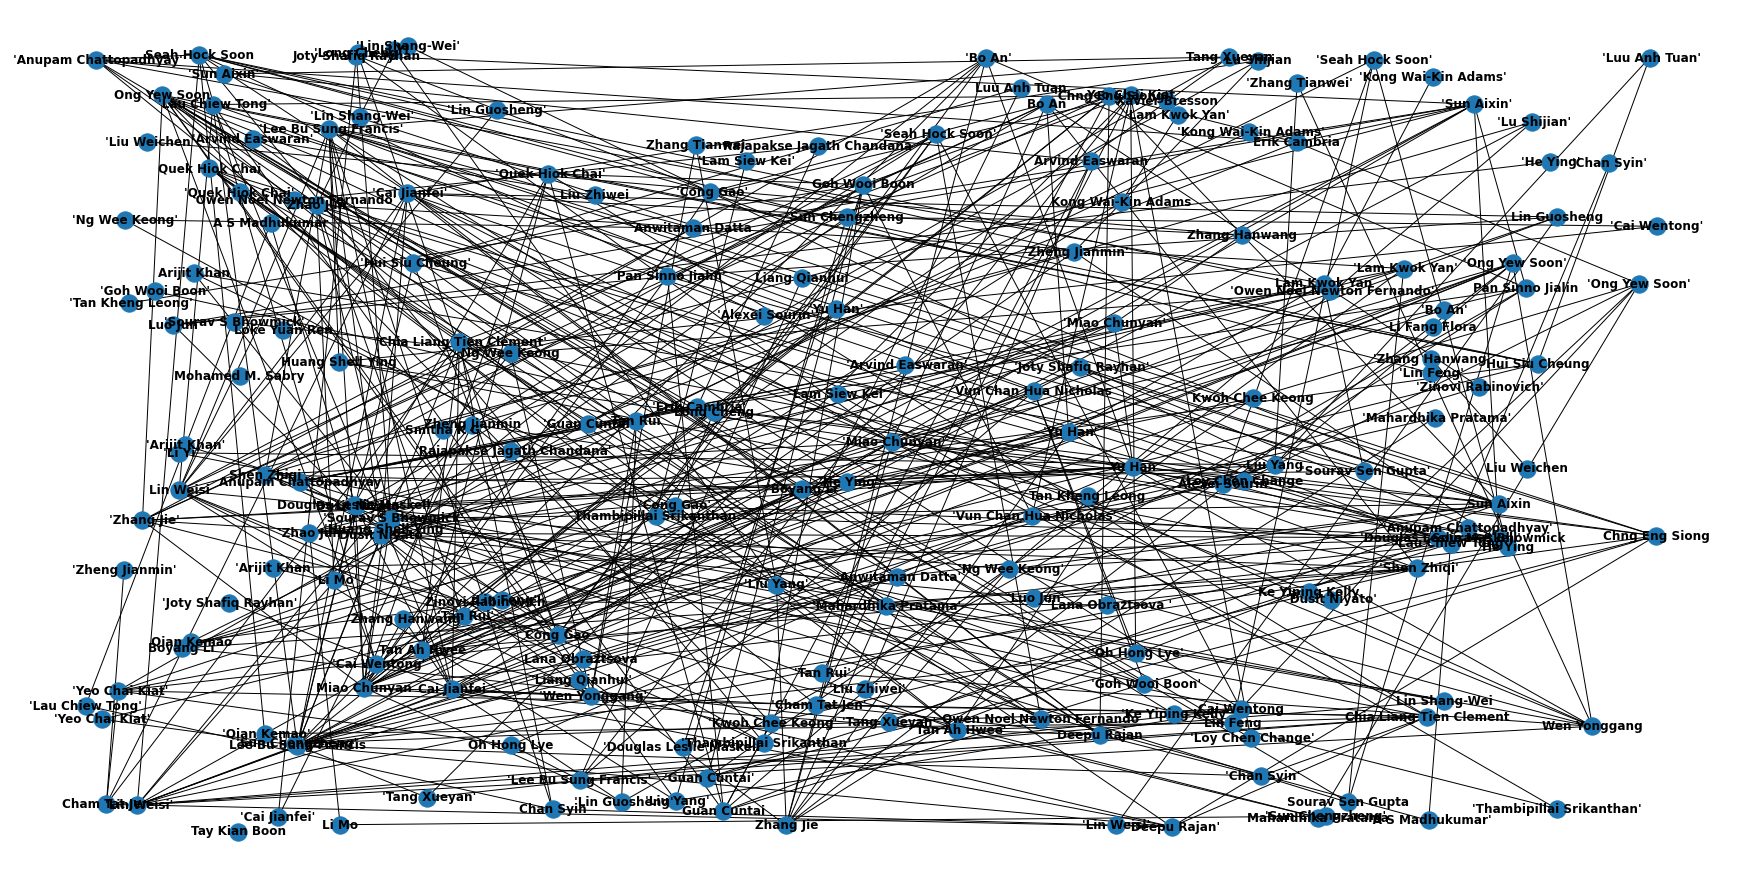

In [11]:
draw_graph_year('2020')

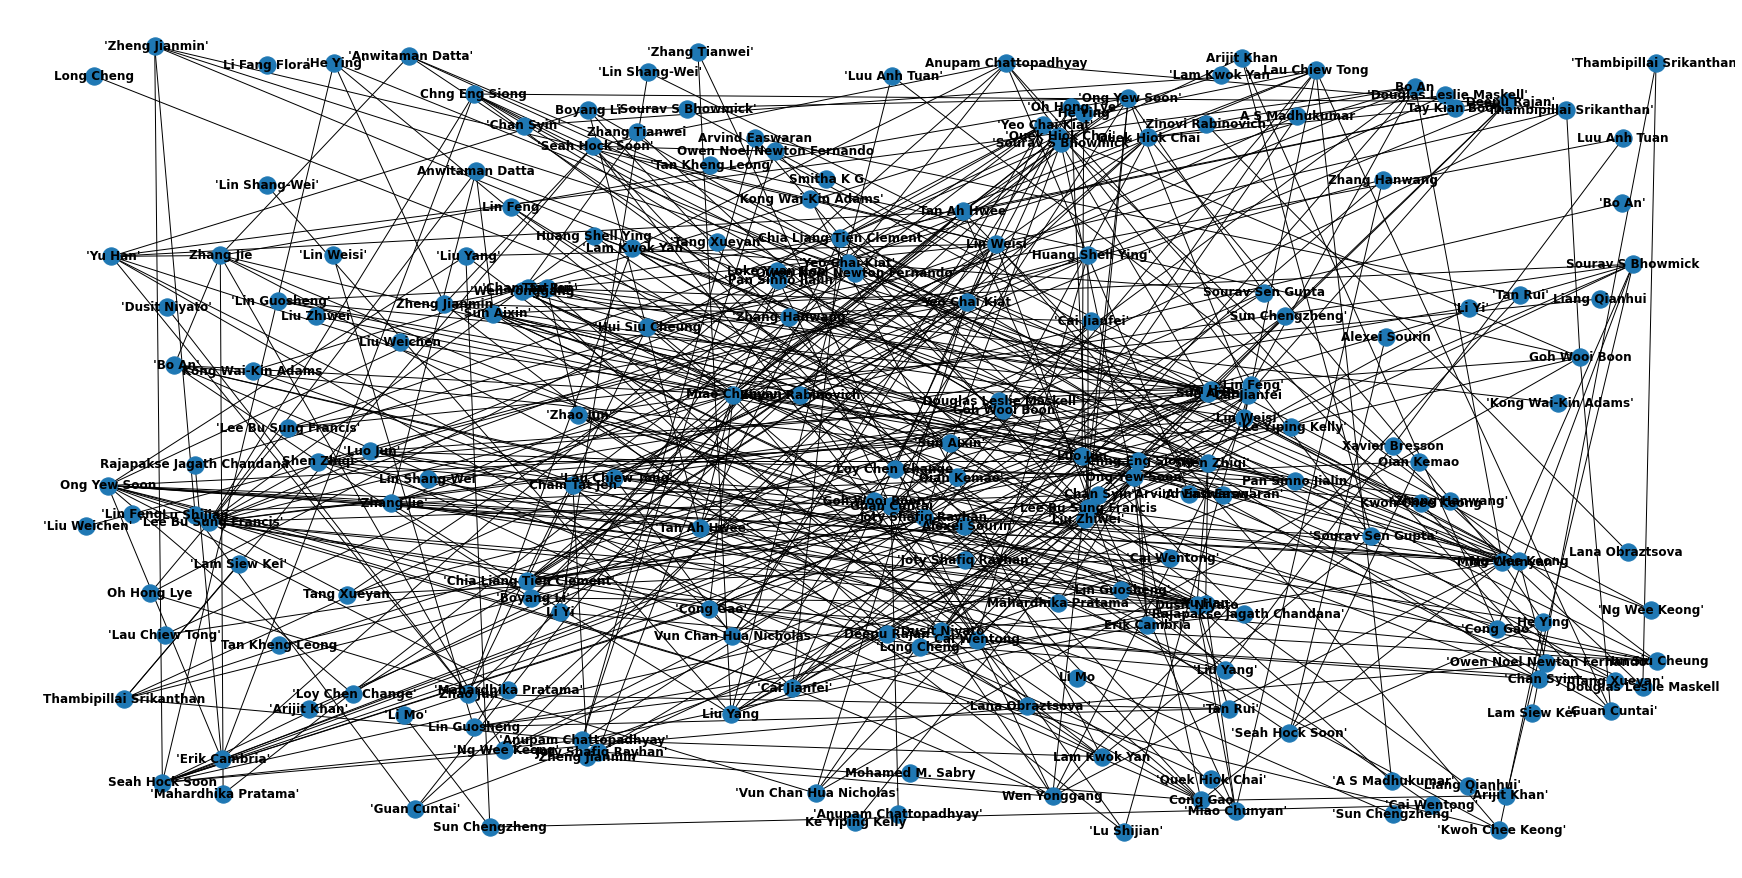

In [12]:
for i in (range(2020,2021)):
    draw_graph_year(str(i))